Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html#sphx-glr-auto-examples-algorithms-plot-davis-club-py

What can you infer about the relationships between (1) the women, and (2) the social events?  

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms import bipartite
from networkx.algorithms import community

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

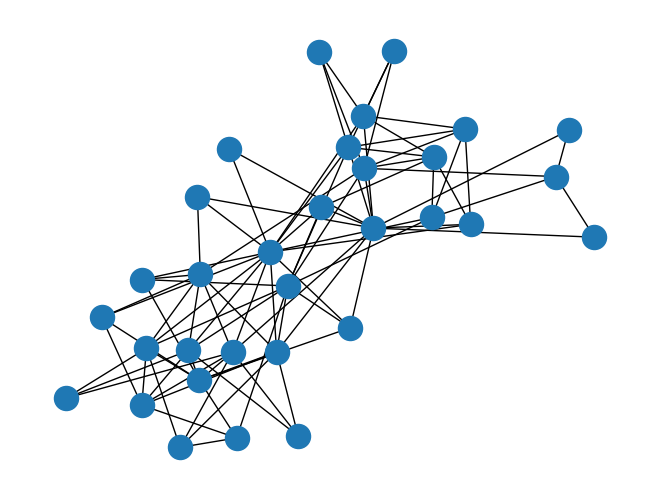

__________________________________________________________________________________________________________________________________________________


In [3]:
# Load dataset
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# Project the bipartite graph onto women nodes, keeping the number of co-occurrences
# The degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

# Seed layout for reproducible node positions
pos = nx.spring_layout(G, seed=648)  
nx.draw(G, pos)
plt.show()
print("__________________________________________________________________________________________________________________________________________________")

----- Relationships between the women -----

The projected women’s network shows ties between women who attended the same social events. A higher degree means these women went to many of the same events as others: they’re socially well-connected. These women likely serve as bridges or central figures, connecting multiple smaller friendships and having higher Degree and Betweenness Centrality.

The weighted projection (#Friend meetings) is how many total events each pair attended together — not just whether they ever attended together.

Women with higher weighted degrees attended more events. Given that the clusters are so dense and interconnected, it suggests these women are the core members of the friendship network. Women with lower weights attended fewer meetings and had weaker ties and centrality.

Overall, the women form two main clusters, with strong intra-group connections and a few individuals bridging the two — a pattern consistent with early findings from the original study. I have included a list of the most and least socially connected women in the network.


=== Friendship Communities ===
Group 1: ['Dorothy Murchison', 'Flora Price', 'Helen Lloyd', 'Katherina Rogers', 'Myra Liddel', 'Nora Fayette', 'Olivia Carleton', 'Pearl Oglethorpe', 'Sylvia Avondale', 'Verne Sanderson']
Group 2: ['Brenda Rogers', 'Charlotte McDowd', 'Eleanor Nye', 'Evelyn Jefferson', 'Frances Anderson', 'Laura Mandeville', 'Ruth DeSand', 'Theresa Anderson']

=== Top Central Women ===
Theresa Anderson: 57.0 total shared events
Evelyn Jefferson: 50.0 total shared events
Brenda Rogers: 46.0 total shared events
Sylvia Avondale: 46.0 total shared events
Laura Mandeville: 45.0 total shared events

=== Possible Outliers (Lowest Participation) ===
Dorothy Murchison: 24.0 total shared events
Olivia Carleton: 14.0 total shared events
Flora Price: 14.0 total shared events


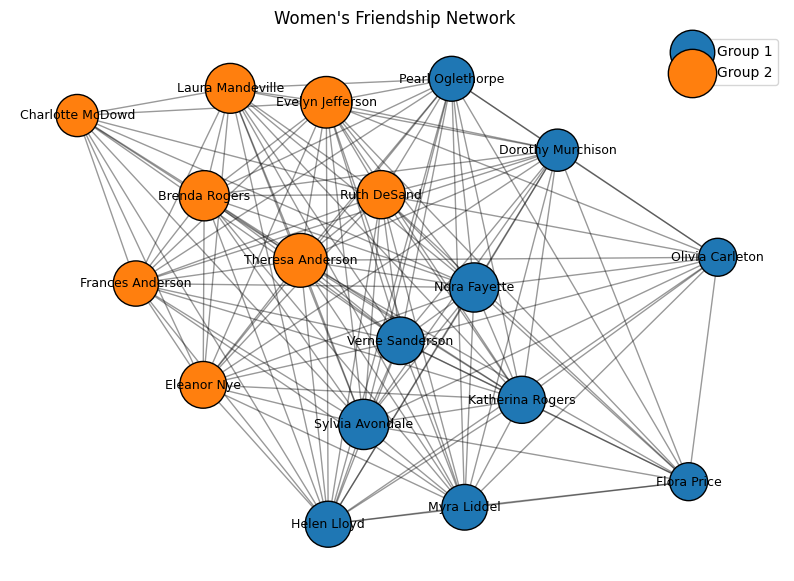

In [24]:
###### Checking Relationships between Women  ######

# Compute centrality and degree metrics
degree_centrality = nx.degree_centrality(W)
weighted_degree = dict(W.degree(weight="weight"))

# Detect community structure (friendship groups)
communities = list(community.greedy_modularity_communities(W, weight="weight"))

print("\n=== Friendship Communities ===")
for i, com in enumerate(communities, 1):
    print(f"Group {i}: {sorted(list(com))}")

# Identify top connectors (socially central women)
sorted_degree = sorted(weighted_degree.items(), key=lambda x: x[1], reverse=True)
print("\n=== Top Central Women ===")
for w, val in sorted_degree[:5]:
    print(f"{w}: {val:.1f} total shared events")

# Identify outliers (least connected women)
print("\n=== Possible Outliers (Lowest Participation) ===")
for w, val in sorted_degree[-3:]:
    print(f"{w}: {val:.1f} total shared events")

# --- Visualize the friendship network with colored communities & scaled nodes ---
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(W, seed=42)

# Assign each community a color
colors = plt.cm.tab10.colors

# Scale node sizes based on social connectedness (weighted degree)
max_size = 1500
min_size = 500
sizes = [min_size + (weighted_degree[n] / max(weighted_degree.values())) * (max_size - min_size)
         for n in W.nodes()]

# Draw each community with its color
for i, com in enumerate(communities):
    nx.draw_networkx_nodes(
        W,
        pos,
        nodelist=list(com),
        node_color=[colors[i % len(colors)]],
        node_size=[sizes[list(W.nodes()).index(n)] for n in list(com)],
        edgecolors="black",
        label=f"Group {i+1}"
    )

nx.draw_networkx_edges(W, pos, alpha=0.4)
nx.draw_networkx_labels(W, pos, font_size=9)
plt.title("Women's Friendship Network ", fontsize=12)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.show()

<Figure size 1200x600 with 0 Axes>

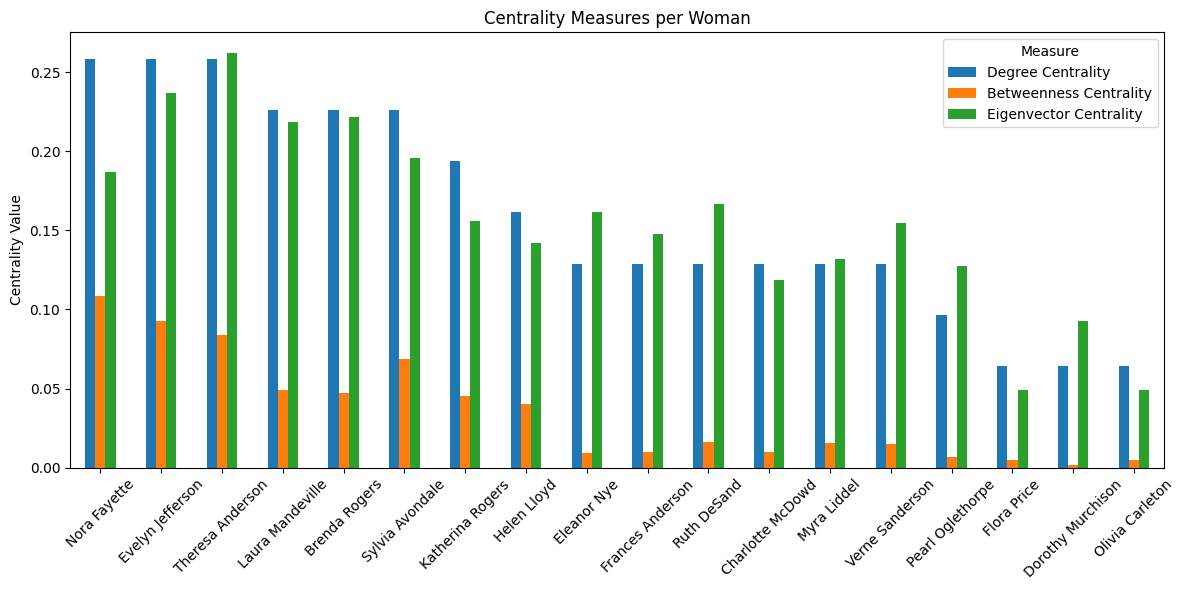

In [22]:
# Centrality Measures 

# Compute measures across network
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Make DataFrame
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
    }).reset_index().rename(columns={'index': 'Woman'})

# Sort 
centrality_df = centrality_df.sort_values('Degree Centrality', ascending=False)

# Identify women nodes 
women_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]

# Filter metrics for women 
centrality_df_women = centrality_df[centrality_df['Woman'].isin(women_nodes)].reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
centrality_df_women.plot(
    x='Woman',
    kind='bar',
    figsize=(12, 6),
    rot=45,
    title='Centrality Measures per Woman',
)
plt.ylabel('Centrality Value')
plt.xlabel('')
plt.legend(title='Measure')
plt.tight_layout()
plt.show()

----- Relationships between Social Events -----

The event projection would show which events share attendees. Events connected by many women would represent similar social circles or closely related gatherings, like parties among friend groups. Events with few or no shared attendees may represent distinct social subgroups or separate social occasions.

Interestingly, there appear to be 2 sets of events: The first being E6, E7, E8, E9, which all have the same centrality measures. The other set is all other events. This is because in projected bipartite networks that are based on shared neighbors (women), the weighted projection causes repeated centralities. If multiple events share the same sets of women, their connections to other events will be identical, and will produce the same network structure for these events. 

This suggests that the 2 sets of events naturally fall into two clusters in terms of shared attendance: one cluster is fully interconnected (everyone shares women with everyone else in that cluster), and the other cluster is less densely connected. A Betweenness centrality of 0 suggests that these events are shared among cliques. The Eigenvector centrality reflects a node being connected to other well-connected nodes. In a perfectly symmetric subgraph (clique), all nodes will have the same EC. 

In [26]:
# Identify event nodes (assuming bipartite=1)
event_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]

# Create the event-event projection
event_network = bipartite.weighted_projected_graph(G, event_nodes)

# Compute centrality measures for events 
degree_centrality_events = nx.degree_centrality(event_network)
betweenness_centrality_events = nx.betweenness_centrality(event_network)
eigenvector_centrality_events = nx.eigenvector_centrality(event_network)

# Combine into DataFrame
centrality_events_df = pd.DataFrame({
    'Degree Centrality': degree_centrality_events,
    'Betweenness Centrality': betweenness_centrality_events,
    'Eigenvector Centrality': eigenvector_centrality_events
}).reset_index().rename(columns={'index': 'Event'})

# Sort
centrality_events_df = centrality_events_df.sort_values('Eigenvector Centrality', ascending=False).reset_index(drop=True)
centrality_events_df

,Event,Degree Centrality,Betweenness Centrality,Eigenvector Centrality
0,E6,1.000000,0.080128,0.339336
1,E7,1.000000,0.080128,0.339336
2,E8,1.000000,0.080128,0.339336
3,E9,1.000000,0.080128,0.339336
4,E1,0.615385,0.000000,0.232251
5,E2,0.615385,0.000000,0.232251
6,E3,0.615385,0.000000,0.232251
7,E4,0.615385,0.000000,0.232251
8,E5,0.615385,0.000000,0.232251
9,E10,0.615385,0.000000,0.232251


One clear way to spot clusters of highly overlapping events is a similarity matrix based on shared women. The higher the value in the matrix, the more common the sets of women were in attendance. 

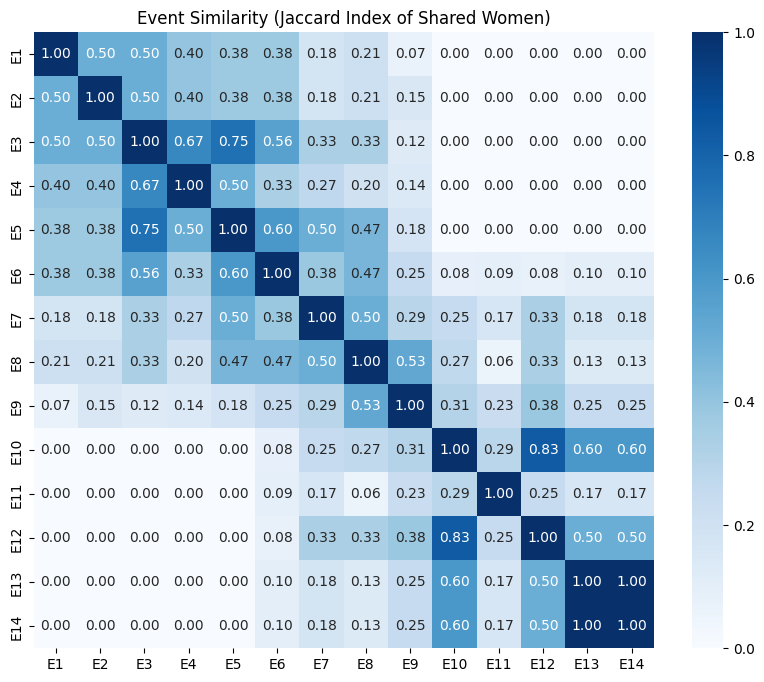

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Create a dictionary of events: women who attended
event_women = {event: set(G.neighbors(event)) for event in event_nodes}

# Create a similarity matrix (Jaccard similarity)
events = list(event_women.keys())
sim_matrix = pd.DataFrame(index=events, columns=events, dtype=float)

for e1, e2 in combinations(events, 2):
    set1 = event_women[e1]
    set2 = event_women[e2]
    # Jaccard similarity = intersection / union
    sim = len(set1 & set2) / len(set1 | set2)
    sim_matrix.loc[e1, e2] = sim
    sim_matrix.loc[e2, e1] = sim

# Fill diagonal with 1.0
for e in events:
    sim_matrix.loc[e, e] = 1.0

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Event Similarity (Jaccard Index of Shared Women)")
plt.show()